In [5]:
import os
import torch

print(torch.cuda.is_available())

True


In [ ]:
#!kaggle datasets download -d vipoooool/new-plant-diseases-dataset
#download dataset


Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100%|█████████████████████████████████████▉| 2.69G/2.70G [00:02<00:00, 1.44GB/s]
100%|██████████████████████████████████████| 2.70G/2.70G [00:02<00:00, 1.43GB/s]


In [6]:
import zipfile
with zipfile.ZipFile("new-plant-diseases-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("data/raw/")


In [6]:
import torch
import torchvision
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
from torchvision import models
import matplotlib.pyplot as plt
import numpy as np


In [7]:
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

valid_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])



In [9]:
train_dir = "data/train"
valid_dir = "data/valid"
test_dir  = "data/test"

train_data = datasets.ImageFolder(train_dir, transform=train_transform)
valid_data = datasets.ImageFolder(valid_dir, transform=valid_transform)
test_data  = datasets.ImageFolder(test_dir,  transform=valid_transform)


In [10]:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_data, batch_size=32, shuffle=False)


In [11]:
num_classes = len(train_data.classes)
num_classes


38

In [12]:
model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V2)


In [13]:
for param in model.parameters():
    param.requires_grad = False   # Freeze all layers first


In [14]:
in_features = model.fc.in_features
model.fc = nn.Linear(in_features, num_classes)


In [15]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

print(device)


cuda


In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)


In [17]:
def train_one_epoch(model, train_loader, optimizer, criterion, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100 * correct / total
    return epoch_loss, epoch_acc


def validate(model, valid_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in valid_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(valid_loader)
    epoch_acc = 100 * correct / total
    return epoch_loss, epoch_acc


In [22]:
import sys, subprocess

print("Using Python:", sys.executable)

# Install numpy into THIS exact Python environment
subprocess.check_call([sys.executable, "-m", "pip", "install", "numpy"])


Using Python: /home/437b/.venv/bin/python


0

In [18]:
epochs = 3   # Stage 1: only 3 epochs (quick warm-up)

for epoch in range(epochs):

    train_loss, train_acc = train_one_epoch(model, train_loader, optimizer, criterion, device)
    val_loss, val_acc = validate(model, valid_loader, criterion, device)

    print(f"Epoch [{epoch+1}/{epochs}]")
    print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%")
    print(f"Valid Loss: {val_loss:.4f} | Valid Acc: {val_acc:.2f}%")
    print("-" * 50)


Epoch [1/3]
Train Loss: 0.5302 | Train Acc: 90.81%
Valid Loss: 0.1881 | Valid Acc: 96.07%
--------------------------------------------------
Epoch [2/3]
Train Loss: 0.1586 | Train Acc: 96.29%
Valid Loss: 0.1294 | Valid Acc: 97.17%
--------------------------------------------------
Epoch [3/3]
Train Loss: 0.1150 | Train Acc: 96.92%
Valid Loss: 0.1013 | Valid Acc: 97.31%
--------------------------------------------------


In [29]:
import numpy as np
import torch

print("NumPy OK:", np.__version__)
print("CUDA available:", torch.cuda.is_available())


NumPy OK: 2.3.5
CUDA available: True


In [28]:
import sys
print("NOTEBOOK PYTHON =", sys.executable)

import numpy as np
print("NumPy import test:", np.__file__)


NOTEBOOK PYTHON = /home/437b/.venv/bin/python
NumPy import test: /home/437b/.venv/lib/python3.12/site-packages/numpy/__init__.py


In [26]:
import sys
!{sys.executable} -m pip uninstall -y torch torchvision torchaudio


Found existing installation: torch 2.9.1
Uninstalling torch-2.9.1:
  Successfully uninstalled torch-2.9.1
Found existing installation: torchvision 0.24.1
Uninstalling torchvision-0.24.1:
  Successfully uninstalled torchvision-0.24.1


In [27]:
import sys
!{sys.executable} -m pip install torch torchvision --index-url https://download.pytorch.org/whl/cu121


Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.4/780.4 MB 53.5 MB/s  0:00:09:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 57.7 MB/s  0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 74.6 MB/s  0:00:00m0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 41.8 MB/s  0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 72.5 MB/s  0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 57.4 MB/s  0:00:08:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 70.2 MB/s  0:00:05:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 79.0 MB/s  0:00:01:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 78.7 MB/s  0:00:00m0:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 81.5 MB/s  0:00:01:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 81.3 MB/s  0:0

In [20]:
# date 4.12,25 unfreeze deeper layers

for name, param in model.named_parameters():
    if "layer4" in name or "layer3" in name:  
        param.requires_grad = True


In [21]:
optimizer = torch.optim.Adam(
    filter(lambda p: p.requires_grad, model.parameters()),
    lr=1e-4
)


In [22]:
epochs = 3  # Stage-2

for epoch in range(epochs):
    train_loss, train_acc = train_one_epoch(model, train_loader, optimizer, criterion, device)
    val_loss, val_acc = validate(model, valid_loader, criterion, device)

    print(f"Epoch [{epoch+1}/{epochs}]")
    print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%")
    print(f"Valid Loss: {val_loss:.4f} | Valid Acc: {val_acc:.2f}%")
    print("------------------------------------------------")


Epoch [1/3]
Train Loss: 0.0361 | Train Acc: 98.81%
Valid Loss: 0.0170 | Valid Acc: 99.44%
------------------------------------------------
Epoch [2/3]
Train Loss: 0.0143 | Train Acc: 99.54%
Valid Loss: 0.0131 | Valid Acc: 99.60%
------------------------------------------------
Epoch [3/3]
Train Loss: 0.0114 | Train Acc: 99.64%
Valid Loss: 0.0075 | Valid Acc: 99.78%
------------------------------------------------


In [23]:
import os

os.makedirs("models", exist_ok=True)
model_path = "models/plantdoctor_resnet50_stage2.pth"
torch.save(model.state_dict(), model_path)
print("Model saved to:", model_path)


Model saved to: models/plantdoctor_resnet50_stage2.pth


In [24]:
model.eval()


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [25]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [26]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms

# We'll store activations and gradients here
gradcam_activations = {}
gradcam_gradients = {}

# 1. Hook functions
def save_activation(module, input, output):
    gradcam_activations["value"] = output.detach()

def save_gradient(module, grad_input, grad_output):
    # grad_output is a tuple; we want the gradient wrt the output feature maps
    gradcam_gradients["value"] = grad_output[0].detach()

# 2. Register hooks on the last conv block (layer4)
target_layer = model.layer4  # This is the last feature block in ResNet50
forward_handle = target_layer.register_forward_hook(save_activation)
backward_handle = target_layer.register_full_backward_hook(save_gradient)
# If register_full_backward_hook doesn't exist in your PyTorch version,
# use: target_layer.register_backward_hook(save_gradient)


In [27]:
def generate_gradcam_heatmap(model, image_tensor, class_idx=None):
    """
    image_tensor: 1 x 3 x H x W tensor (already normalized & on device)
    class_idx: optional, index of target class. If None, uses predicted class.
    """
    model.zero_grad()
    gradcam_activations.clear()
    gradcam_gradients.clear()

    # Forward pass
    output = model(image_tensor)  # shape: [1, num_classes]
    
    if class_idx is None:
        class_idx = output.argmax(dim=1).item()
    
    # Create one-hot for the target class
    one_hot = torch.zeros_like(output)
    one_hot[0, class_idx] = 1.0
    
    # Backward pass for that class
    output.backward(gradient=one_hot, retain_graph=True)
    
    # Get stored activations and gradients
    activations = gradcam_activations["value"]      # [1, C, H, W]
    gradients = gradcam_gradients["value"]          # [1, C, H, W]
    
    # Global average pooling over gradients -> weights
    weights = gradients.mean(dim=(2, 3), keepdim=True)  # [1, C, 1, 1]
    
    # Weighted sum of activations
    cam = (weights * activations).sum(dim=1, keepdim=True)  # [1, 1, H, W]
    
    # ReLU
    cam = F.relu(cam)
    
    # Normalize to [0, 1]
    cam = cam - cam.min()
    if cam.max() > 0:
        cam = cam / cam.max()
    
    # Resize to 224x224 (or input size)
    cam = F.interpolate(cam, size=(224, 224), mode="bilinear", align_corners=False)
    
    # Convert to numpy
    heatmap = cam.squeeze().cpu().numpy()  # H x W (0..1)
    return heatmap, class_idx


In [28]:
# Inverse normalization to get back to [0,1] image for plotting
inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.225]
)

def tensor_to_numpy_image(tensor):
    """
    tensor: 3 x H x W (normalized)
    returns: H x W x 3 image in [0,1]
    """
    img = inv_normalize(tensor.cpu())
    img = torch.clamp(img, 0, 1)    # keep in [0,1]
    img = img.permute(1, 2, 0).numpy()  # HWC
    return img


Predicted: Apple___Apple_scab
True     : Apple___Apple_scab


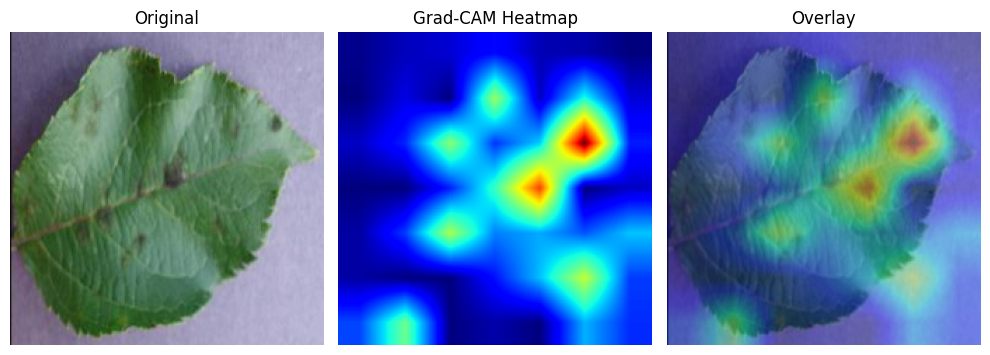

In [29]:
# Get one batch from validation set
images, labels = next(iter(valid_loader))
images = images.to(device)
labels = labels.to(device)

# Take first image in the batch
img = images[0].unsqueeze(0)  # 1 x 3 x H x W

# Run Grad-CAM
heatmap, class_idx = generate_gradcam_heatmap(model, img)

pred_class_name = train_data.classes[class_idx]
true_class_name = train_data.classes[labels[0].item()]

print("Predicted:", pred_class_name)
print("True     :", true_class_name)

# Prepare base image and heatmap overlay
base_img = tensor_to_numpy_image(images[0])

plt.figure(figsize=(10,4))

plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(base_img)
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Grad-CAM Heatmap")
plt.imshow(heatmap, cmap="jet")
plt.axis("off")

plt.subplot(1,3,3)
plt.title("Overlay")
plt.imshow(base_img)
plt.imshow(heatmap, cmap="jet", alpha=0.4)
plt.axis("off")

plt.tight_layout()
plt.show()
